In [31]:
# Brief Description
"""
Let us consider two points a and
We say,
a dominates b iff ax(x-coordinate of a) >= bx(x-coordinate of b) and
ay(y-coordinate of a) >= by(y-coordinate of b)

Maximal points: Not dominated by any other point in the plane.

Problem:
Given some points in a x-y plane you have to find maximal points.

Author: Shravan
Date: 15 Jan 2024
"""

'\nLet us consider two points a and \nWe say,\na dominates b iff ax(x-coordinate of a) >= bx(x-coordinate of b) and\nay(y-coordinate of a) >= by(y-coordinate of b)\n\nMaximal points: Not dominated by any other point in the plane.\n\nProblem:\nGiven some points in a x-y plane you have to find maximal points.\n\nAuthor: Shravan\nDate: 15 Jan 2024\n'

In [32]:
# Input list of coordinates randomly generated
lst = [(7.7, 0.8), (36.4, 39.3), (48.4, 29.9), (31.3, 46.1), (0.1, 34.1),
	    (3.9, 26.7), (17.8, 42.1), (3.8, 23.2), (14.0, 30.8), (49.8, 11.1),
		(25.6, 6.0), (46.7, 22.7), (9.9, 42.2), (10.4, 38.6), (40.0, 0.8),
		(46.1, 32.3), (20.7, 29.4), (43.4, 4.2), (38.8, 48.7), (29.7, 3.3),
		(31.6, 19.4), (18.3, 47.1), (34.4, 42.2), (20.3, 37.8), (34.7, 27.1)]

In [33]:
# Function for sorting the coordinates on x-axis basis
def sort_coordinates_by_x(coordinates):
    return sorted(coordinates, key=lambda coord: coord[0])

In [34]:
def findMaximalRL(lst):
	"""
	Returns maximal points on a x-y plane.

	The steps involved:
	> Sort the input list of coordinates on x-coordinate
	> Iterate Right to Left keeping a currentmax and a candidate list
	> add to candidate, if the point is maximul point otherwise skip
	"""
	maximalPoints = []
	comparisons = 0     # initializer for comparison count
	sorted_on_x = sort_coordinates_by_x(lst)
	currentMax = sorted_on_x[-1]
	for coordinates in reversed(sorted_on_x[:-1]):
		comparisons += 1
		if coordinates[1]>=currentMax[1]:
			maximalPoints.append(currentMax)
			currentMax = (coordinates[0], coordinates[1])
		else:
			continue
	maximalPoints.append(currentMax)
	return maximalPoints, comparisons

maximalPointsRL, comparisionRL = findMaximalRL(lst)
print("Maximal points by right to left sweep: ", maximalPointsRL)
print("Number of comparisions required in right to left sweep are: ", comparisionRL)

Maximal points by right to left sweep:  [(49.8, 11.1), (48.4, 29.9), (46.1, 32.3), (38.8, 48.7)]
Number of comparisions required in right to left sweep are:  24


In [35]:
def findMaximalLR(lst):
	"""
	Returns maximal points on a x-y plane.
	The steps involved:
	> Sort the input list of coordinates on x-coordinate
	> iterate from left to right
	> pick a point & remove the points that are dominated by current point,
		from the candidate list and add this to candidate list.
	"""
	maximulPoints = []
	comparisons = 0
	sorted_on_x = sort_coordinates_by_x(lst)
	for coordinate in sorted_on_x:
		idx = 0
		while idx<len(maximulPoints):
			comparisons += 1
			if maximulPoints[idx][0]<=coordinate[0] and maximulPoints[idx][1]<=coordinate[1]:
				maximulPoints.pop(idx)
			else:
				idx += 1
		maximulPoints.append(coordinate)
	return maximulPoints, comparisons

maximalPointsLR, comparisionLR = findMaximalLR(lst)
print("Maximal points by left to right sweep: ", maximalPointsLR)
print("Number of comparisions required in left to right sweep are: ", comparisionLR)

Maximal points by left to right sweep:  [(38.8, 48.7), (46.1, 32.3), (48.4, 29.9), (49.8, 11.1)]
Number of comparisions required in left to right sweep are:  60


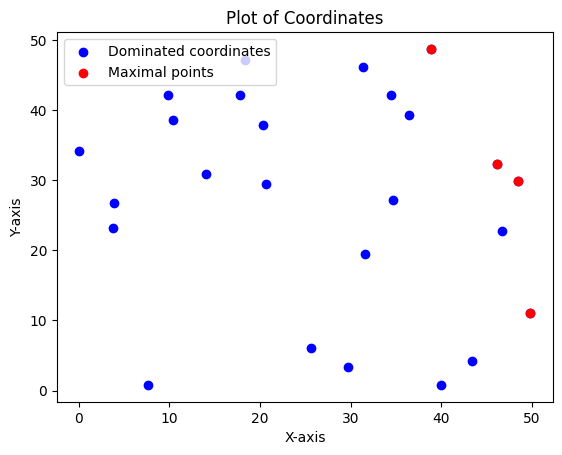

In [36]:
###----------Code for Visualization of the coordinates----------------###
import matplotlib.pyplot as plt

x_values, y_values = zip(*lst)
x_maximal, y_maximal = zip(*maximalPointsLR)

# Plotting the points
plt.scatter(x_values, y_values, color='blue', marker='o', label='Dominated coordinates')
plt.scatter(x_maximal, y_maximal, color='red', marker='o', label='Maximal points')


plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of Coordinates')

plt.legend()

plt.show()
